<a href="https://colab.research.google.com/github/Tasfia48/vis_rep_prog_comprehension_project_795/blob/main/Vision_Transformer_VIT32.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Libraries and Configurations

In [ ]:
pip install -U tensorflow-addons

     |████████████████████████████████| 1.1 MB 15.2 MB/s 


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_addons as tfa
import glob, warnings
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

warnings.filterwarnings('ignore')
print('TensorFlow Version ' + tf.__version__)

TensorFlow Version 2.8.0


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa
import pandas as pd
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout, MaxPooling2D, Flatten

### Load Data

In [ ]:
!gdown https://drive.google.com/uc?id=1Cn_hwxJlo1R8I0IDGQcNzPUYtyD6T9a2 #FULL DATASET
#!gdown https://drive.google.com/uc?id=18ZKkAW5nPcUOBDeZ3xRjtvErBhAKVKoD #only java csv


Downloading...
From: https://drive.google.com/uc?id=1Cn_hwxJlo1R8I0IDGQcNzPUYtyD6T9a2
To: /content/Readability_Dataset_Complete.zip
100% 61.1M/61.1M [00:00<00:00, 91.7MB/s]


In [ ]:
!unzip 'Readability_Dataset_Complete.zip' &>/dev/null

### Java Only

In [ ]:
nsh_dark_java = pd.read_csv('MergedTotal_NSH_Dark/csv/merged_java.csv')
nsh_light_java = pd.read_csv('MergedTotal_NSH_Light/csv/merged_java.csv')
sh_light_java = pd.read_csv('MergedTotal_SH_Light/csv/merged_java.csv')
sh_dark_java = pd.read_csv('MergedTotal_SH_Dark/csv/merged_java.csv')

nsh_dark_java['filepaths'] = "MergedTotal_NSH_Dark/" + nsh_dark_java['filepaths']
nsh_light_java['filepaths'] = "MergedTotal_NSH_Light/" + nsh_light_java['filepaths']
sh_light_java['filepaths'] = "MergedTotal_SH_Light/" + sh_light_java['filepaths']
sh_dark_java['filepaths'] = "MergedTotal_SH_Dark/" + sh_dark_java['filepaths']

train_nsh_dark, val_nsh_dark, test_nsh_dark = \
              np.split(nsh_dark_java.sample(frac=1, random_state=42), 
                       [int(.8*len(nsh_dark_java)), int(.9*len(nsh_dark_java))])
              
train_sh_dark, val_sh_dark, test_sh_dark = \
              np.split(sh_dark_java.sample(frac=1, random_state=42), 
                       [int(.8*len(sh_dark_java)), int(.9*len(sh_dark_java))])

train_nsh_light, val_nsh_light, test_nsh_light = \
              np.split(nsh_light_java.sample(frac=1, random_state=42), 
                       [int(.8*len(nsh_light_java)), int(.9*len(nsh_light_java))])
              
train_sh_light, val_sh_light, test_sh_light = \
              np.split(sh_light_java.sample(frac=1, random_state=42), 
                       [int(.8*len(sh_light_java)), int(.9*len(sh_light_java))])
              
train_df_java = pd.concat([train_nsh_dark,train_sh_dark,train_nsh_light,train_sh_light], ignore_index=True)
val_df_java = pd.concat([val_nsh_dark,val_sh_dark,val_nsh_light,val_sh_light], ignore_index=True)
test_df_java = pd.concat([test_nsh_dark,test_sh_dark,test_nsh_light,test_sh_light], ignore_index=True)

val_df_java['readable'] = val_df_java['readable'].astype(str) 
train_df_java['readable'] = train_df_java['readable'].astype(str) 
test_df_java['readable'] = test_df_java['readable'].astype(str) 

### Complete Dataset

In [ ]:
nsh_dark_total = pd.read_csv('MergedTotal_NSH_Dark/csv/merged_total.csv')
nsh_light_total = pd.read_csv('MergedTotal_NSH_Light/csv/merged_total.csv')
sh_light_total = pd.read_csv('MergedTotal_SH_Light/csv/merged_total.csv')
sh_dark_total = pd.read_csv('MergedTotal_SH_Dark/csv/merged_total.csv')

nsh_dark_total['filepaths'] = "MergedTotal_NSH_Dark/" + nsh_dark_total['filepaths']
nsh_light_total['filepaths'] = "MergedTotal_NSH_Light/" + nsh_light_total['filepaths']
sh_light_total['filepaths'] = "MergedTotal_SH_Light/" + sh_light_total['filepaths']
sh_dark_total['filepaths'] = "MergedTotal_SH_Dark/" + sh_dark_total['filepaths']

train_nsh_dark, val_nsh_dark, test_nsh_dark = \
              np.split(nsh_dark_total.sample(frac=1, random_state=42), 
                       [int(.8*len(nsh_dark_total)), int(.9*len(nsh_dark_total))])
              
train_sh_dark, val_sh_dark, test_sh_dark = \
              np.split(sh_dark_total.sample(frac=1, random_state=42), 
                       [int(.8*len(sh_dark_total)), int(.9*len(sh_dark_total))])

train_nsh_light, val_nsh_light, test_nsh_light = \
              np.split(nsh_light_total.sample(frac=1, random_state=42), 
                       [int(.8*len(nsh_light_total)), int(.9*len(nsh_light_total))])
              
train_sh_light, val_sh_light, test_sh_light = \
              np.split(sh_light_total.sample(frac=1, random_state=42), 
                       [int(.8*len(sh_light_total)), int(.9*len(sh_light_total))])
              


train_nsh_dark.readable = np.where(train_nsh_dark.average_score >= 3.5, 1, 0)
val_nsh_dark.readable = np.where(val_nsh_dark.average_score >= 3.5, 1, 0)
test_nsh_dark.readable = np.where(test_nsh_dark.average_score >= 3.5, 1, 0)

train_sh_dark.readable = np.where(train_sh_dark.average_score >= 3.5, 1, 0)
val_sh_dark.readable = np.where(val_sh_dark.average_score >= 3.5, 1, 0)
test_sh_dark.readable = np.where(test_sh_dark.average_score >= 3.5, 1, 0)

train_sh_light.readable = np.where(train_sh_light.average_score >= 3.5, 1, 0)
val_sh_light.readable = np.where(val_sh_light.average_score >= 3.5, 1, 0)
test_sh_light.readable = np.where(test_sh_light.average_score >= 3.5, 1, 0)

train_nsh_light.readable = np.where(train_nsh_light.average_score >= 3.5, 1, 0)
val_nsh_light.readable = np.where(val_nsh_light.average_score >= 3.5, 1, 0)
test_nsh_light.readable = np.where(test_nsh_light.average_score >= 3.5, 1, 0)

train_df = pd.concat([train_nsh_dark,train_sh_dark,train_nsh_light,train_sh_light], ignore_index=True)
val_df = pd.concat([val_nsh_dark,val_sh_dark,val_nsh_light,val_sh_light], ignore_index=True)
test_df = pd.concat([test_nsh_dark,test_sh_dark,test_nsh_light,test_sh_light], ignore_index=True)

val_df['readable'] = val_df['readable'].astype(str) 
train_df['readable'] = train_df['readable'].astype(str) 
test_df['readable'] = test_df['readable'].astype(str) 

### Data Generator

In [ ]:
IMAGE_SIZE = 224
BATCH_SIZE = 15


datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

train_gen = datagen.flow_from_dataframe(dataframe= train_df,
                                        #has_ext=False,
                                        x_col='filepaths',
                                        y_col='readable',
                                        batch_size=BATCH_SIZE,
                                        seed=6,
                                        shuffle=True,
                                        color_mode="rgb",
                                        class_mode="categorical",
                                        #validate_filenames=True,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE))

test_gen = datagen.flow_from_dataframe(dataframe= test_df,
                                        #has_ext=False,
                                        x_col='filepaths',
                                        y_col='readable',
                                        batch_size=BATCH_SIZE,
                                        seed=6,
                                        shuffle=True,
                                        color_mode="rgb",
                                        class_mode="categorical",
                                        #validate_filenames=True,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE))

validation_gen = datagen.flow_from_dataframe(dataframe= val_df,
                                        #has_ext=False,
                                        x_col='filepaths',
                                        y_col='readable',
                                        batch_size=BATCH_SIZE,
                                        seed=6,
                                        shuffle=True,
                                        color_mode="rgb",
                                        class_mode="categorical",
                                        #validate_filenames=True,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE))

Found 2111 validated image filenames belonging to 2 classes.
Found 264 validated image filenames belonging to 2 classes.
Found 264 validated image filenames belonging to 2 classes.


In [ ]:

# images = [train_gen[0][0][i] for i in range(16)]
# fig, axes = plt.subplots(3, 5, figsize = (10, 10))

# axes = axes.flatten()

# for img, ax in zip(images, axes):
#     ax.imshow(img.reshape(IMAGE_SIZE, IMAGE_SIZE, 3))
#     ax.axis('off')

# plt.tight_layout()
# plt.show()

### Building the Model

In [ ]:
!pip install --quiet vit-keras

from vit_keras import vit

vit_model = vit.vit_b32(
        image_size = IMAGE_SIZE,
        activation = 'softmax',
        pretrained = True,
        include_top = False,
        pretrained_top = False,
        classes = 2)

353263616/353253686 [==============================] - 13s 0us/step


In [ ]:
model = tf.keras.Sequential([
        vit_model,
        tf.keras.layers.Flatten(),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(11, activation = tfa.activations.gelu),
        tf.keras.layers.Dense(11, activation = tfa.activations.gelu),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(2, 'softmax')
    ],
    name = 'vision_transformer')

model.summary()

Model: "vision_transformer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vit-b32 (Functional)        (None, 768)               87455232  
                                                                 
 flatten_1 (Flatten)         (None, 768)               0         
                                                                 
 batch_normalization_2 (Batc  (None, 768)              3072      
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 11)                8459      
                                                                 
 dense_3 (Dense)             (None, 11)                132       
                                                                 
 batch_normalization_3 (Batc  (None, 11)               44        
 hNormalization)                                

In [ ]:
learning_rate = 0.0001
EPOCHS = 100

optimizer = tfa.optimizers.RectifiedAdam(learning_rate = learning_rate)

model.compile(optimizer = optimizer, 
              loss = tf.keras.losses.CategoricalCrossentropy(label_smoothing = 0.2), 
              metrics = ['accuracy',tf.keras.metrics.AUC(name='auc')])

STEP_SIZE_TRAIN = train_gen.n // train_gen.batch_size
STEP_SIZE_VALID = validation_gen.n // validation_gen.batch_size

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_auc',
                                                 factor = 0.2,
                                                 patience = 2,
                                                 verbose = 1,
                                                 min_delta = 1e-4,
                                                 min_lr = 1e-6,
                                                 mode = 'max')

earlystopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_auc',
                                                 min_delta = 1e-4,
                                                 patience = 10,
                                                 mode = 'max',
                                                 restore_best_weights = True,
                                                 verbose = 1)

checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath = './model.hdf5',
                                                  monitor = 'val_auc', 
                                                  verbose = 1, 
                                                  save_best_only = True,
                                                  save_weights_only = True,
                                                  mode = 'max')

callbacks = [earlystopping, reduce_lr, checkpointer]

model.fit(x = train_gen,
          steps_per_epoch = STEP_SIZE_TRAIN,
          validation_data = validation_gen,
          validation_steps = STEP_SIZE_VALID,
          epochs = EPOCHS,
          callbacks = callbacks)
# Save the weights
model.save_weights('./checkpoints/my_checkpoint')
# model.save('model.h5', save_weights_only = True)

Epoch 1/100
140/140 [==============================] - ETA: 0s - loss: 0.3660 - accuracy: 0.9862 - auc: 0.9939
Epoch 1: val_auc improved from -inf to 0.72337, saving model to ./model.hdf5
140/140 [==============================] - 61s 266ms/step - loss: 0.3660 - accuracy: 0.9862 - auc: 0.9939 - val_loss: 0.8071 - val_accuracy: 0.7020 - val_auc: 0.7234 - lr: 1.0000e-04
Epoch 2/100
140/140 [==============================] - ETA: 0s - loss: 0.3517 - accuracy: 0.9938 - auc: 0.9989
Epoch 2: val_auc improved from 0.72337 to 0.73008, saving model to ./model.hdf5
140/140 [==============================] - 34s 240ms/step - loss: 0.3517 - accuracy: 0.9938 - auc: 0.9989 - val_loss: 0.7823 - val_accuracy: 0.7020 - val_auc: 0.7301 - lr: 1.0000e-04
Epoch 3/100
140/140 [==============================] - ETA: 0s - loss: 0.3866 - accuracy: 0.9604 - auc: 0.9890
Epoch 3: val_auc did not improve from 0.73008
140/140 [==============================] - 33s 233ms/step - loss: 0.3866 - accuracy: 0.9604 - auc:

In [ ]:
model.load_weights("/content/model.hdf5")
model.evaluate_generator(test_gen)

[0.8582514524459839, 0.6590909361839294, 0.695061445236206]

              precision    recall  f1-score   support

           0       0.62      0.42      0.50       156
           1       0.43      0.62      0.51       108

    accuracy                           0.50       264
   macro avg       0.52      0.52      0.50       264
weighted avg       0.54      0.50      0.50       264



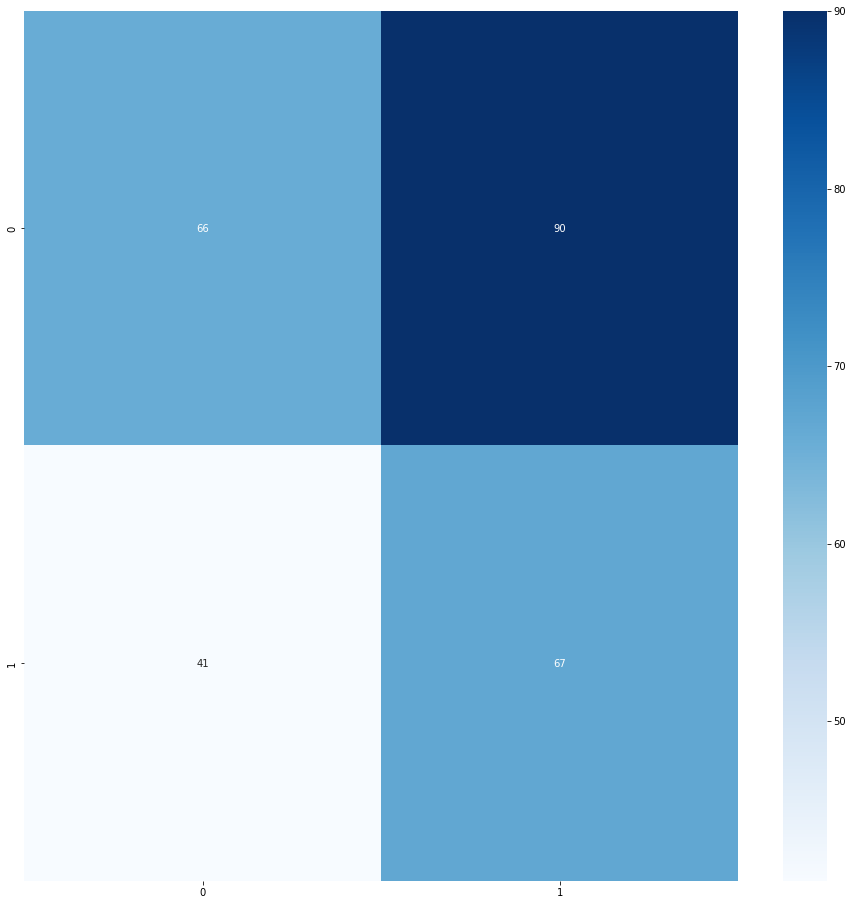

In [ ]:
predicted_classes = np.argmax(model.predict(validation_gen, steps = validation_gen.n // validation_gen.batch_size + 1), axis = 1)
true_classes = validation_gen.classes
class_labels = list(validation_gen.class_indices.keys())  

confusionmatrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize = (16, 16))
sns.heatmap(confusionmatrix, cmap = 'Blues', annot = True, cbar = True)

print(classification_report(true_classes, predicted_classes))